In [1]:
from collections import Counter
from pathlib import Path
from typing import List, Any

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

from monty.serialization import loadfn

from pymatgen import Element
from pymatgen.analysis.graphs import MoleculeGraph

set_matplotlib_formats("retina")
%matplotlib inline

In /Users/ewcss/miniconda3/envs/main/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ewcss/miniconda3/envs/main/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ewcss/miniconda3/envs/main/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/ewcss/miniconda3/envs/main/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/ewcss/

In [2]:
DATASET_PATH = "/Users/ewcss/Documents/grad/publications/2021/li_dataset/data/libe.json"

In [3]:
data = loadfn(DATASET_PATH)

In [16]:
def plot_bar(
    data: List[Any],
    x_label,
    y_label="Count",
    x_shift=0.0,
    y_shift=0.0,
    filename=None,
    font_scale=1.3,
    fig_size=(8, 6),
    num_bins=None,
    logscale=False,
    **kwargs
):
    """
    Args:
        x_shift, y_shift: shift of count annotation in the x/y direction
    """
    sns.set(
        context="notebook",
        style="darkgrid",
        font_scale=font_scale,
        rc={"figure.figsize": fig_size},
    )

    counter = dict(Counter(data))
    keys = sorted(counter.keys())
    y = [counter[k] for k in keys]

    if num_bins is None:
        ax = sns.barplot(x=keys, y=y, **kwargs)
    else:
        ax = sns.histplot(data, stat="count", bins=num_bins, **kwargs)
    if logscale:
        ax.set_yscale("log")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    if num_bins is None:
        # annotate the bar plot with the count
        for i, k in enumerate(keys):
            ax.annotate(counter[k], (i + x_shift, counter[k] + y_shift))

        # adjust y range to give more space for the annotation
        ax.set_ylim(0, max(y) * 1.1)

    # save to file
    if filename is not None:
        figdir = Path("figures").resolve()
        if not figdir.exists():
            figdir.mkdir()
        filename = figdir.joinpath(filename)

        fig = ax.get_figure()
        fig.savefig(filename, bbox_inches="tight")

    return ax

<AxesSubplot:xlabel='Element', ylabel='Count'>

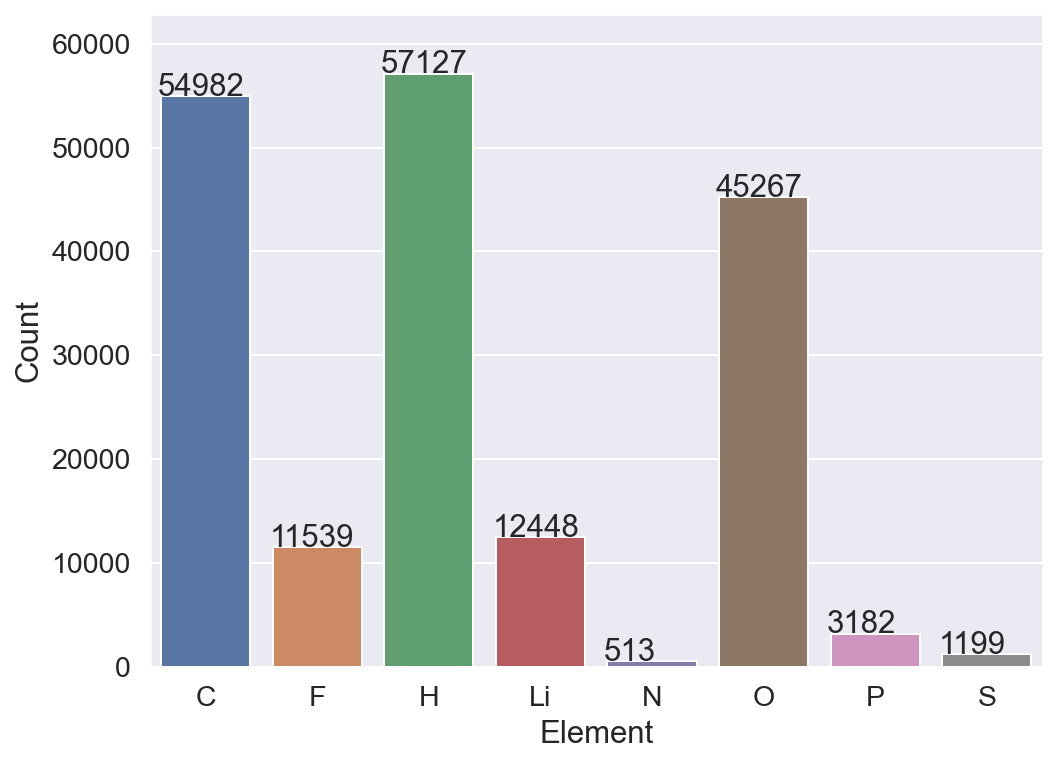

In [5]:
all_species = np.concatenate([m["species"] for m in data])

plot_bar(
    all_species,
    x_label="Element",
    x_shift=-0.43,
    y_shift=20,
)

<AxesSubplot:xlabel='Element', ylabel='Count'>

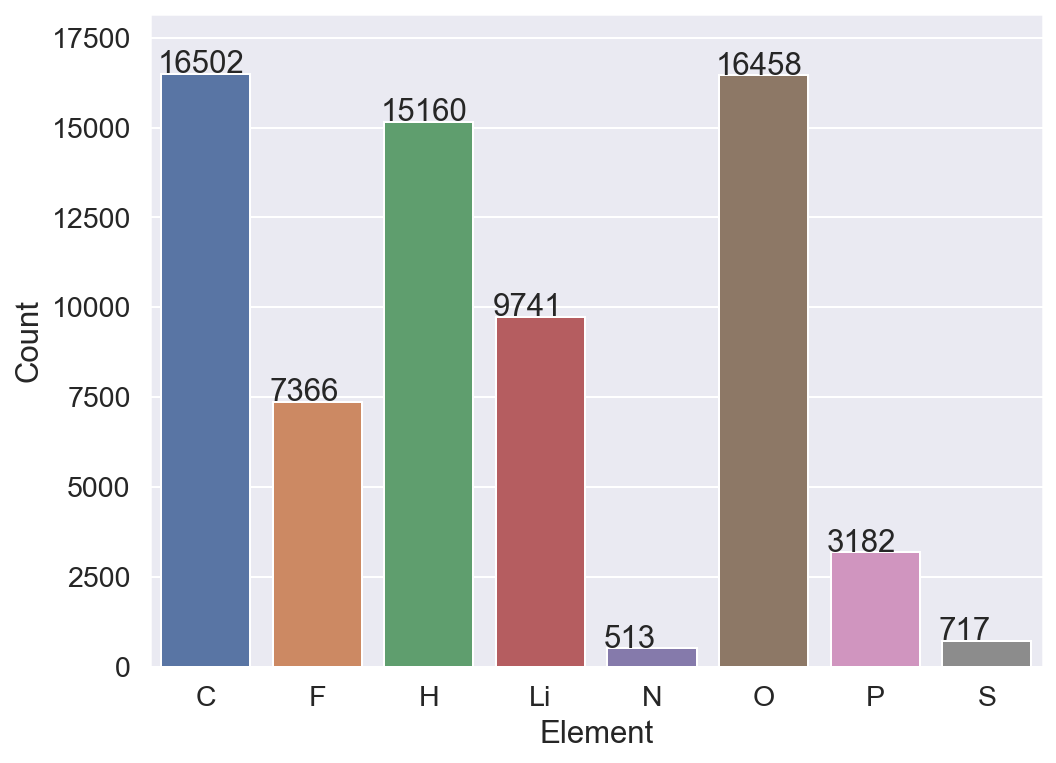

In [6]:
molecules_with_species = np.concatenate([list(set(m["species"])) for m in data])
plot_bar(
    molecules_with_species,
    x_label="Element",
    x_shift=-0.43,
    y_shift=20
)

<AxesSubplot:xlabel='Bond type', ylabel='Count'>

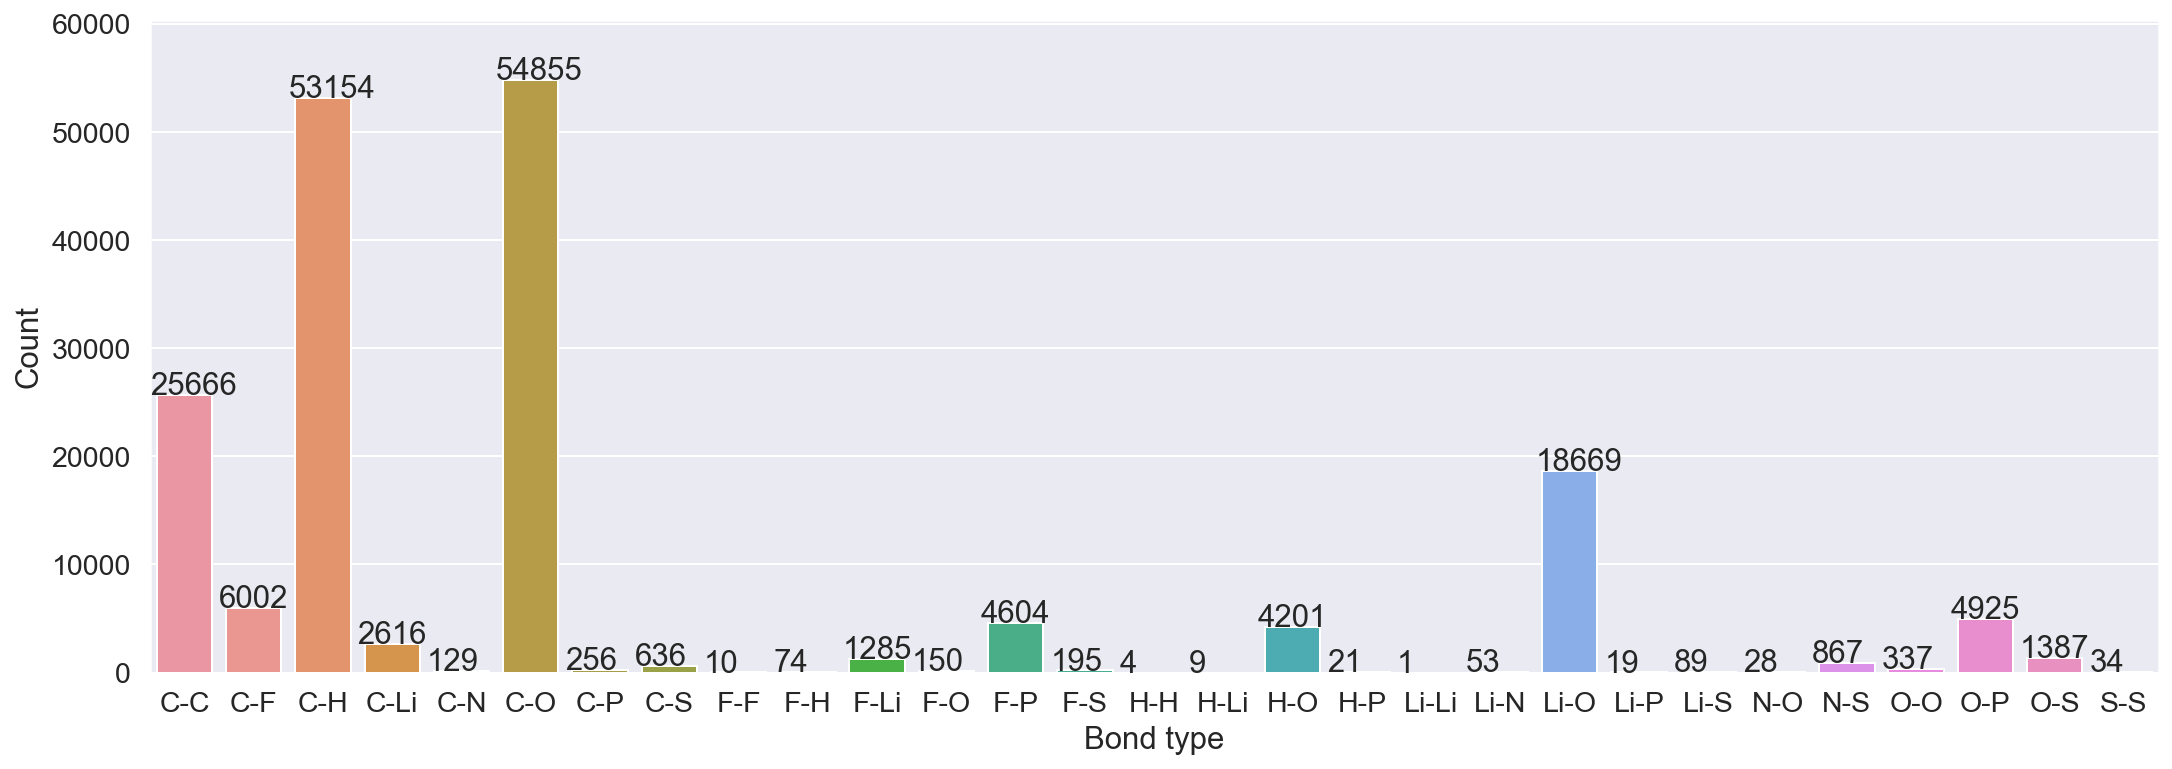

In [7]:
bond_types = list()
for d in data:
    if d["bonds"] is not None:
        for bd in d["bonds"]:
            bd_species = (d["species"][bd[0]], d["species"][bd[1]])
            bd = "-".join(sorted(bd_species))
            bond_types.append(bd)

plot_bar(
    bond_types,
    x_label="Bond type",
    x_shift=-0.5,
    y_shift=30,
    fig_size=(18, 6),
)

<AxesSubplot:xlabel='Number of bonds', ylabel='Count'>

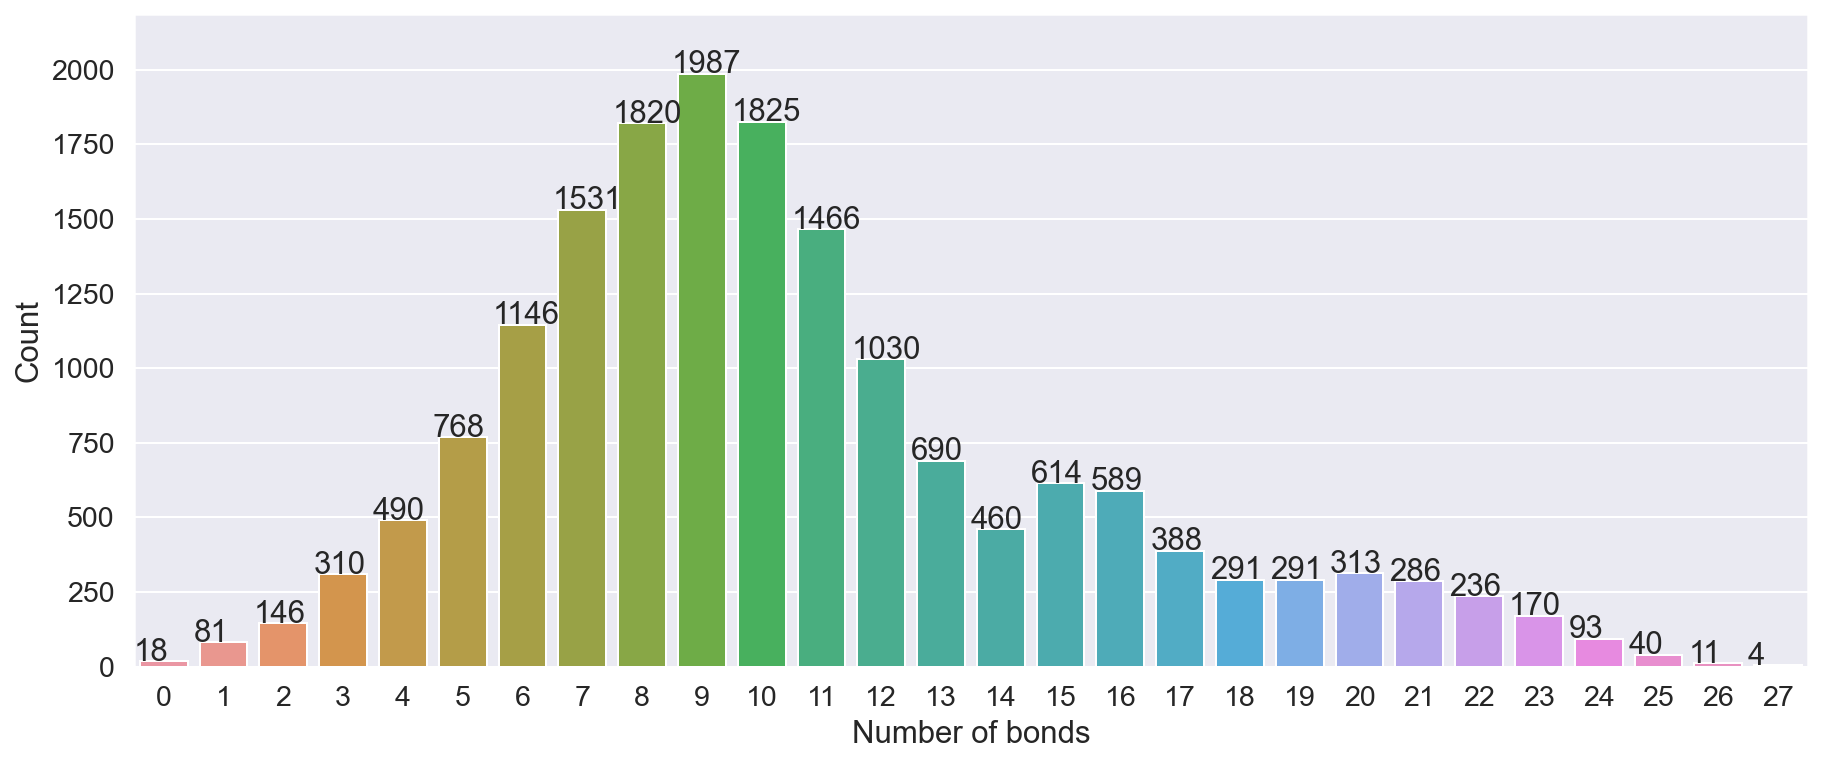

In [8]:
num_bonds = [len(d["bonds"]) for d in data]

plot_bar(
    num_bonds,
    x_label="Number of bonds",
    x_shift=-0.5,
    y_shift=2,
    fig_size=(15, 6),
)

<AxesSubplot:xlabel='Number of electrons', ylabel='Count'>

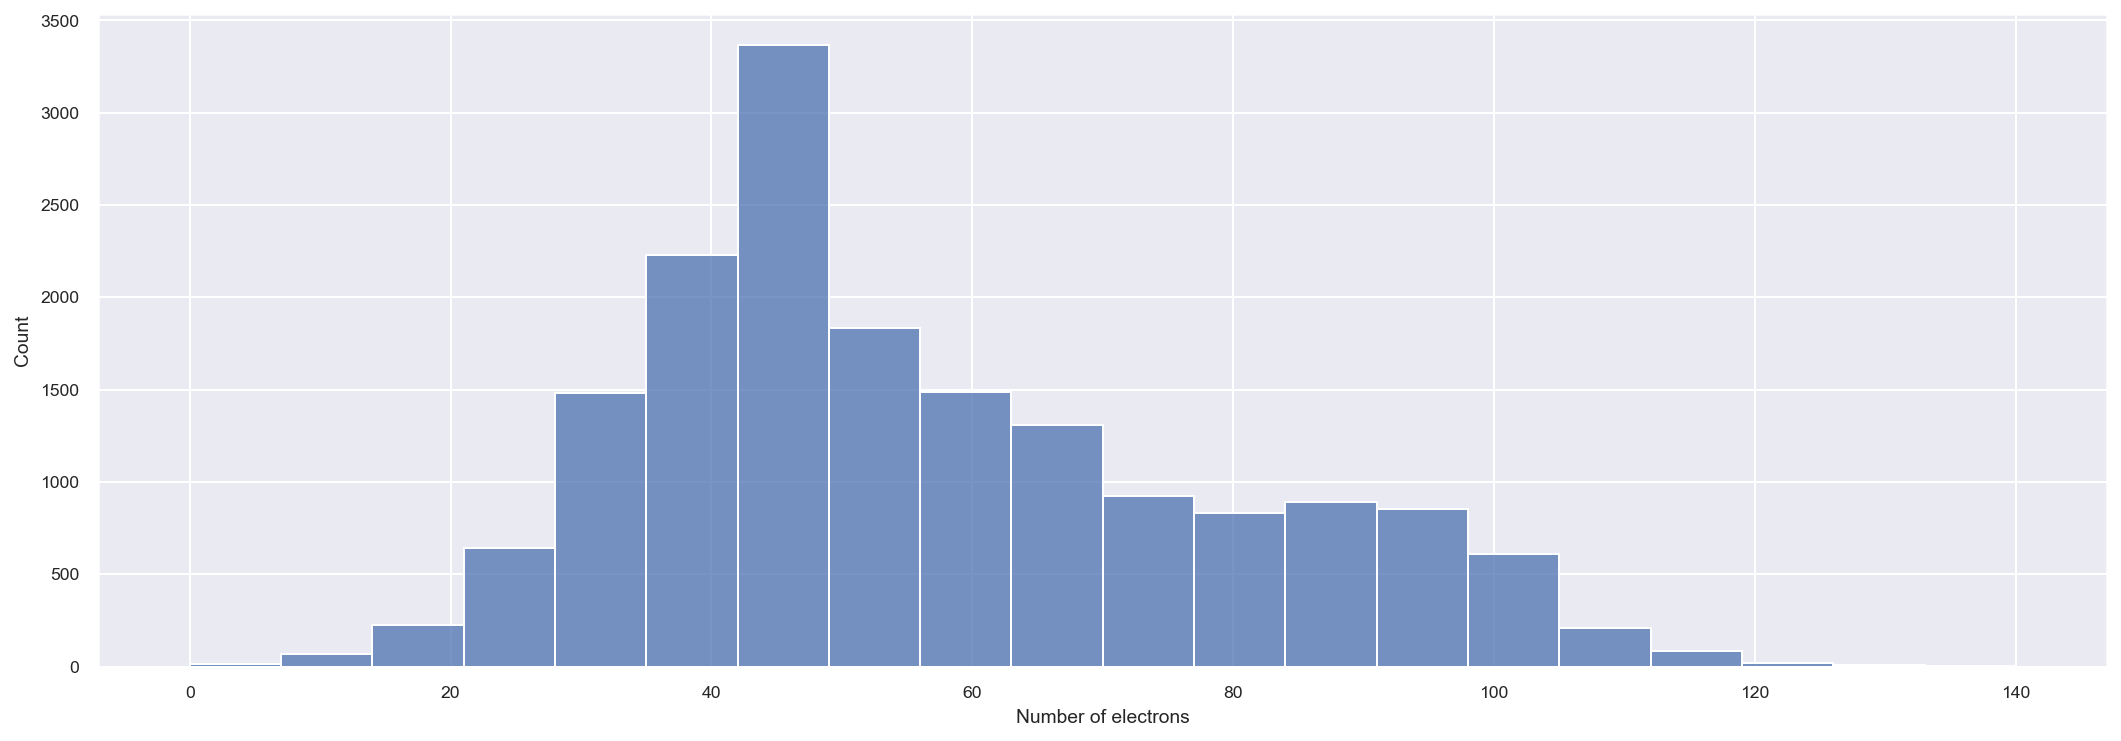

In [19]:
nelectrons = list()
for d in data:
    N = sum([Element(s).Z for s in d["species"]]) - d["charge"]
    nelectrons.append(N)

plot_bar(
    nelectrons,
    x_label="Number of electrons",
    x_shift=-0.2,
    y_shift=2,
    fig_size=(18, 6),
    font_scale=0.8,
    num_bins=20
)

<AxesSubplot:xlabel='Molecule charge', ylabel='Count'>

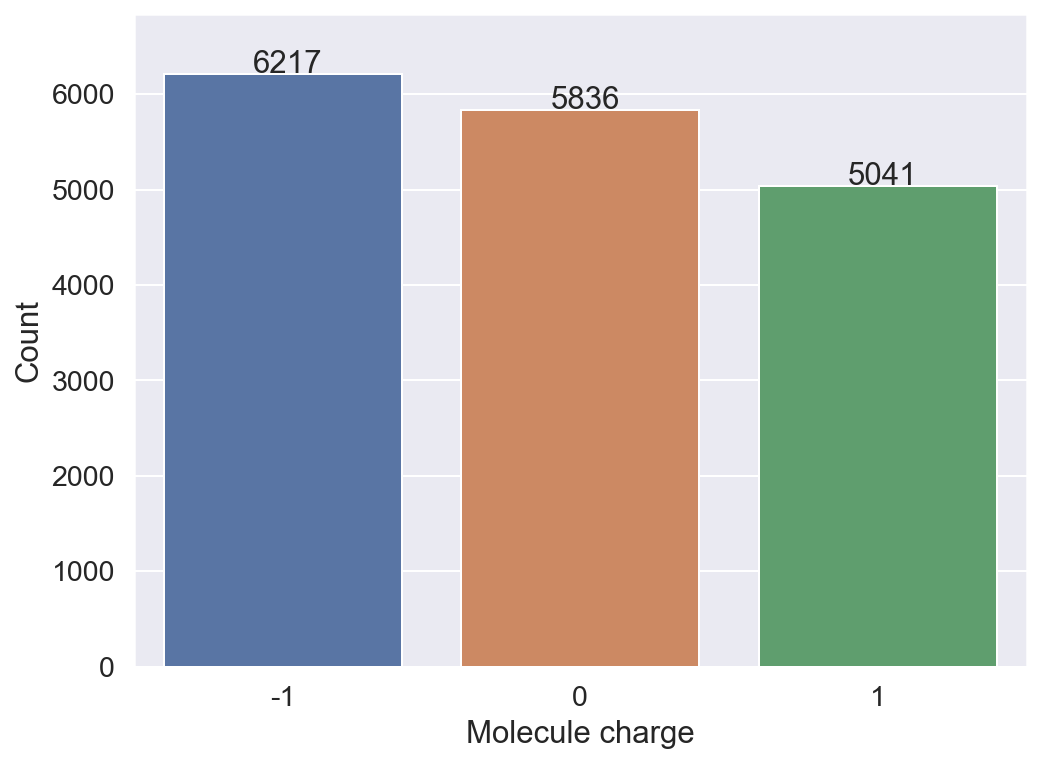

In [20]:
charges = [d["charge"] for d in data]

plot_bar(
    charges,
    x_label="Molecule charge",
    x_shift=-0.1,
    y_shift=10,
)

<AxesSubplot:xlabel='Molecule spin multiplicity', ylabel='Count'>

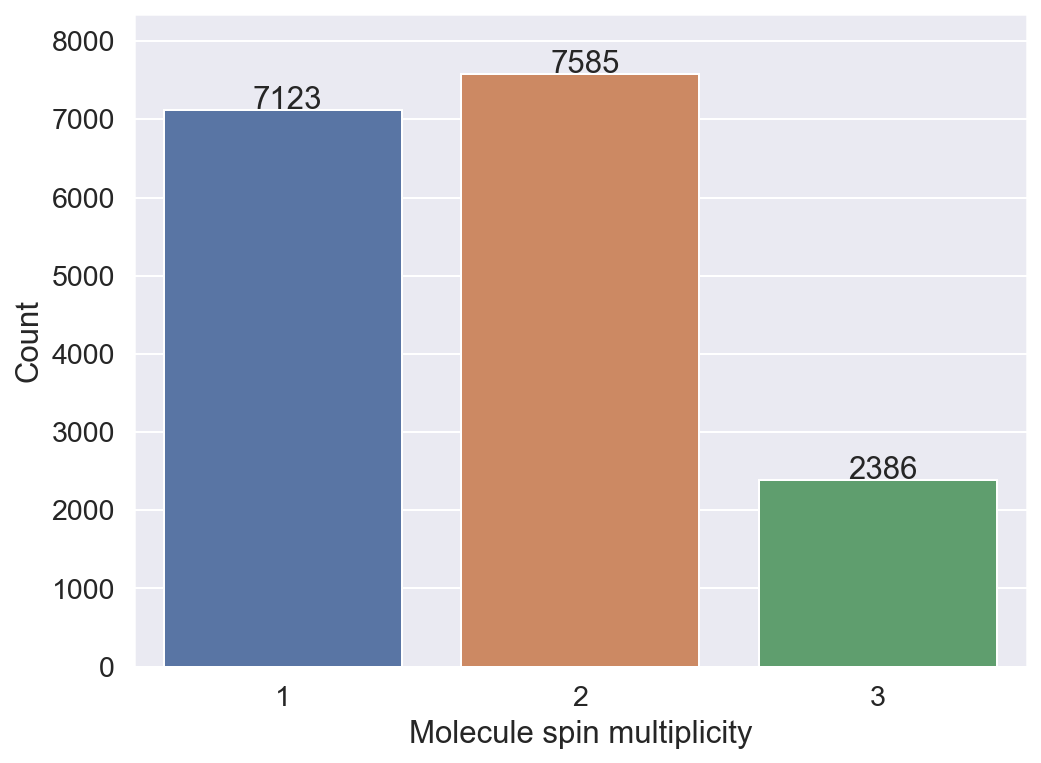

In [22]:
spins = [d["spin_multiplicity"] for d in data]

plot_bar(
    spins,
    x_label="Molecule spin multiplicity",
    x_shift=-0.1,
    y_shift=10,
)